# User Engagement Analysis for Tech Platform 👨🏽‍💻

## Introduction :p

In this simple SQL-based project, I will create my own dataset in order to simulate analyzing user engagement. I will create a local SQLite database within Jupyter Notebook. I used queries to analyze users, such as users per gender, session time per device, and the most viewed pages of a website. All data is created and not imported/used from elsewhere.   

## Load SQL Extension ...

In [100]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [102]:
# Create SQLite Database

%sql sqlite://

In [159]:
%%sql
CREATE TABLE Users (
    user_id INTEGER PRIMARY KEY,
    username TEXT,
    signup_date DATE,
    age INTEGER,
    gender TEXT,
    location TEXT
);

 * sqlite://
(sqlite3.OperationalError) table Users already exists
[SQL: CREATE TABLE Users (
    user_id INTEGER PRIMARY KEY,
    username TEXT,
    signup_date DATE,
    age INTEGER,
    gender TEXT,
    location TEXT
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [106]:
%%sql
CREATE TABLE Sessions (
    session_id INTEGER PRIMARY KEY,
    user_id INTEGER,
    start_time DATETIME,
    end_time DATETIME,
    device TEXT,
    os TEXT,
    browser TEXT,
    FOREIGN KEY (user_id) REFERENCES Users(user_id)
);

 * sqlite://
(sqlite3.OperationalError) table Sessions already exists
[SQL: CREATE TABLE Sessions (
    session_id INTEGER PRIMARY KEY,
    user_id INTEGER,
    start_time DATETIME,
    end_time DATETIME,
    device TEXT,
    os TEXT,
    browser TEXT,
    FOREIGN KEY (user_id) REFERENCES Users(user_id)
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [108]:
%%sql
CREATE TABLE PageViews (
    pageview_id INTEGER PRIMARY KEY,
    session_id INTEGER,
    user_id INTEGER,
    page_url TEXT,
    timestamp DATETIME,
    FOREIGN KEY (session_id) REFERENCES Sessions(session_id),
    FOREIGN KEY (user_id) REFERENCES Users(user_id)
);

 * sqlite://
(sqlite3.OperationalError) table PageViews already exists
[SQL: CREATE TABLE PageViews (
    pageview_id INTEGER PRIMARY KEY,
    session_id INTEGER,
    user_id INTEGER,
    page_url TEXT,
    timestamp DATETIME,
    FOREIGN KEY (session_id) REFERENCES Sessions(session_id),
    FOREIGN KEY (user_id) REFERENCES Users(user_id)
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


## Insert Sample Data 💽

In [111]:
%%sql
INSERT INTO Users (username, signup_date, age, gender, location) VALUES
('alice', '2023-01-15', 28, 'Female', 'New York'),
('bob', '2023-02-20', 34, 'Male', 'San Francisco'),
('carol', '2023-03-05', 22, 'Female', 'Chicago'),
('dave', '2023-04-12', 30, 'Male', 'Los Angeles'),
('eve', '2023-05-01', 27, 'Female', 'Seattle');

 * sqlite://
5 rows affected.


[]

In [113]:
%%sql
INSERT INTO Sessions (user_id, start_time, end_time, device, os, browser) VALUES
(1, '2023-09-01 10:00:00', '2023-09-01 10:30:00', 'Desktop', 'Windows', 'Chrome'),
(2, '2023-09-01 11:00:00', '2023-09-01 11:20:00', 'Mobile', 'iOS', 'Safari'),
(3, '2023-09-02 14:00:00', '2023-09-02 14:45:00', 'Tablet', 'Android', 'Chrome'),
(4, '2023-09-02 15:30:00', '2023-09-02 16:10:00', 'Desktop', 'MacOS', 'Firefox'),
(5, '2023-09-03 09:00:00', '2023-09-03 09:50:00', 'Mobile', 'Android', 'Chrome');

 * sqlite://
5 rows affected.


[]

In [115]:
%%sql
INSERT INTO PageViews (session_id, user_id, page_url, timestamp) VALUES
(1, 1, 'homepage', '2023-09-01 10:05:00'),
(1, 1, 'product_page', '2023-09-01 10:10:00'),
(2, 2, 'homepage', '2023-09-01 11:05:00'),
(3, 3, 'search_results', '2023-09-02 14:15:00'),
(4, 4, 'checkout', '2023-09-02 15:35:00');

 * sqlite://
5 rows affected.


[]

## Analyzing Data 🔎

### Count Total Users by Gender ✌🏽

In [119]:
%%sql
SELECT gender, COUNT(*) AS total_users
FROM Users
GROUP BY gender;

 * sqlite://
Done.


gender,total_users
Female,6
Male,4


### Avg. Session Duration by Device ⏳

In [121]:
%%sql
SELECT device, AVG(JULIANDAY(end_time) - JULIANDAY(start_time)) * 24 * 60 AS avg_session_minutes
FROM Sessions
GROUP BY device;

 * sqlite://
Done.


device,avg_session_minutes
Desktop,34.999999925494194
Mobile,34.99999959021807
Tablet,45.0


### Most Viewed Pages 🥸

In [123]:
%%sql
SELECT page_url,COUNT(*) AS views
FROM PageViews
GROUP BY page_url
ORDER BY views DESC;

 * sqlite://
Done.


page_url,views
homepage,4
search_results,2
product_page,2
checkout,2


## Visualization 🌅

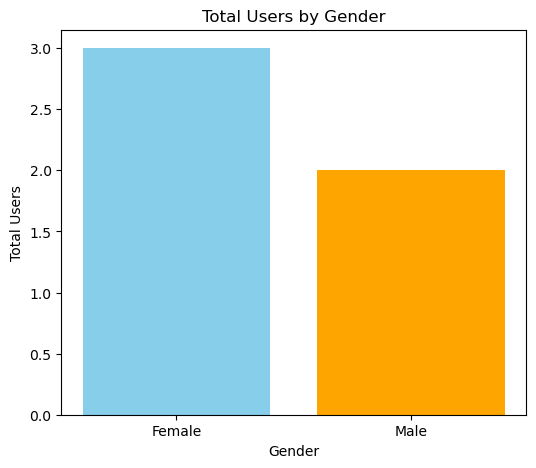

In [125]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Connect to the SQLite database (in-memory already, so no need to create one)
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Creates tables and inserts sample data
cursor.execute('''CREATE TABLE Users (
                     user_id INTEGER PRIMARY KEY,
                     username TEXT,
                     signup_date DATE,
                     age INTEGER,
                     gender TEXT,
                     location TEXT
                 );''')

cursor.execute('''CREATE TABLE Sessions (
                     session_id INTEGER PRIMARY KEY,
                     user_id INTEGER,
                     start_time DATETIME,
                     end_time DATETIME,
                     device TEXT,
                     os TEXT,
                     browser TEXT,
                     FOREIGN KEY (user_id) REFERENCES Users(user_id)
                 );''')

cursor.execute('''CREATE TABLE PageViews (
                     pageview_id INTEGER PRIMARY KEY,
                     session_id INTEGER,
                     user_id INTEGER,
                     page_url TEXT,
                     timestamp DATETIME,
                     FOREIGN KEY (session_id) REFERENCES Sessions(session_id),
                     FOREIGN KEY (user_id) REFERENCES Users(user_id)
                 );''')

# Inserts sample data
cursor.executescript('''
    INSERT INTO Users (username, signup_date, age, gender, location) VALUES
    ('alice', '2023-01-15', 28, 'Female', 'New York'),
    ('bob', '2023-02-20', 34, 'Male', 'San Francisco'),
    ('carol', '2023-03-05', 22, 'Female', 'Chicago'),
    ('dave', '2023-04-12', 30, 'Male', 'Los Angeles'),
    ('eve', '2023-05-01', 27, 'Female', 'Seattle');

    INSERT INTO Sessions (user_id, start_time, end_time, device, os, browser) VALUES
    (1, '2023-09-01 10:00:00', '2023-09-01 10:30:00', 'Desktop', 'Windows', 'Chrome'),
    (2, '2023-09-01 11:00:00', '2023-09-01 11:20:00', 'Mobile', 'iOS', 'Safari'),
    (3, '2023-09-02 14:00:00', '2023-09-02 14:45:00', 'Tablet', 'Android', 'Chrome'),
    (4, '2023-09-02 15:30:00', '2023-09-02 16:10:00', 'Desktop', 'MacOS', 'Firefox'),
    (5, '2023-09-03 09:00:00', '2023-09-03 09:50:00', 'Mobile', 'Android', 'Chrome');

    INSERT INTO PageViews (session_id, user_id, page_url, timestamp) VALUES
    (1, 1, 'homepage', '2023-09-01 10:05:00'),
    (1, 1, 'product_page', '2023-09-01 10:10:00'),
    (2, 2, 'homepage', '2023-09-01 11:05:00'),
    (3, 3, 'search_results', '2023-09-02 14:15:00'),
    (4, 4, 'checkout', '2023-09-02 15:35:00');
''')

# Query to count total users by gender
query_gender = 'SELECT gender, COUNT(*) AS total_users FROM Users GROUP BY gender;'
df_gender = pd.read_sql_query(query_gender, conn)

# Plots the total users by gender
plt.figure(figsize=(6, 5))
plt.bar(df_gender['gender'], df_gender['total_users'], color=['skyblue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Total Users')
plt.title('Total Users by Gender')
plt.show()


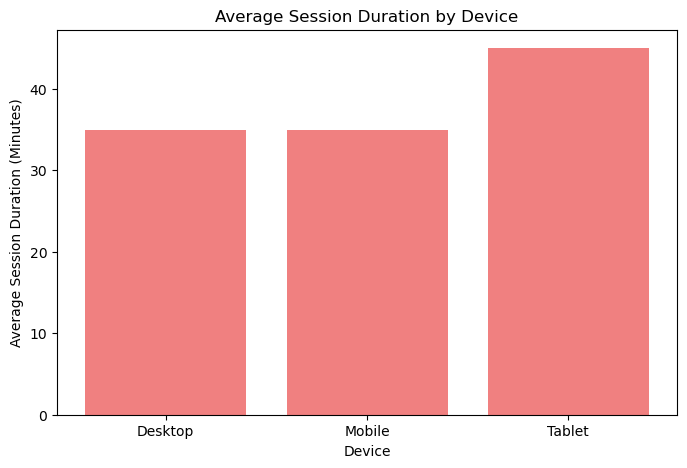

In [77]:
# Query to calculate average session duration by device
query_device = '''SELECT device, AVG((JULIANDAY(end_time) - JULIANDAY(start_time)) * 24 * 60) AS avg_session_minutes
                  FROM Sessions
                  GROUP BY device;'''
df_device = pd.read_sql_query(query_device, conn)

# Plots the average session duration by device
plt.figure(figsize=(8, 5))
plt.bar(df_device['device'], df_device['avg_session_minutes'], color='lightcoral')
plt.xlabel('Device')
plt.ylabel('Average Session Duration (Minutes)')
plt.title('Average Session Duration by Device')
plt.show()


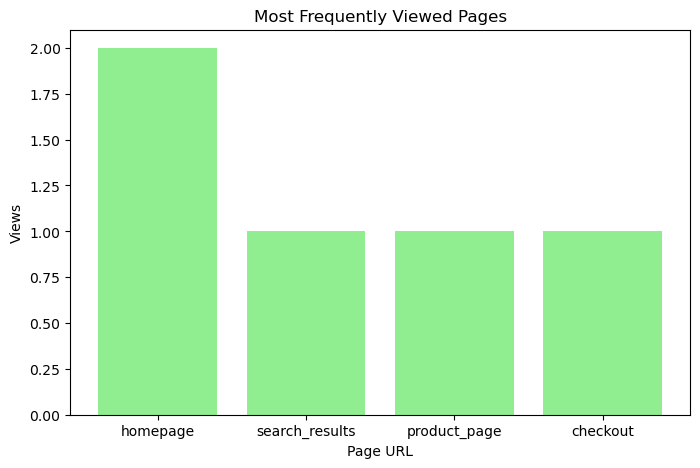

In [127]:
# Query for the most frequently viewed pages
query_pages = '''SELECT page_url, COUNT(*) AS views
                 FROM PageViews
                 GROUP BY page_url
                 ORDER BY views DESC;'''
df_pages = pd.read_sql_query(query_pages, conn)

# Plots the most frequently viewed pages
plt.figure(figsize=(8, 5))
plt.bar(df_pages['page_url'], df_pages['views'], color='lightgreen')
plt.xlabel('Page URL')
plt.ylabel('Views')
plt.title('Most Frequently Viewed Pages')
plt.show()


In [147]:
# Exports the datafram to a CSV file
df_gender.to_csv('user_gender_distribution.csv', index=False)

## Summary Report :p

This tech platform has very few users as seen from the data. To summarize: there are more female users than male, there are more tablet users than other devices, and the most viewed page is the homepage. Need to send this report to marketing so they can obtain more users for the company.